# Select an isochrone from the mass metallicity relation
Kirby et al. 2013 (2013 ApJ 779 102) gives for nearby dSph and dIrr galaxies with masses $3<M^*<9$:

$
⟨[{\rm Fe/H}]⟩ = (−1.69 \pm 0.04)+(0.30 \pm 0.02) \log (􏰁M􏰂^∗ / 10^6 M_\odot)
$

Intrinsic scatter is about 0.1 dex.  The same slope and small scatter is found by Hidalgo+17 for a somewhat different sample. 

The Kirby paper also gives distributions of metallicity within galaxies, fit to chemical evolution models. That's a bridge to far for these simulations at the moment. 

In [1]:
import numpy as np
from scipy import stats
from astropy.table import Table

In [2]:
# Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

The class below will set up distribution functions in metallicity and age. For metallicity, use the Kirby relation. For now, we'll just use a Gaussian in age. Include a method to select the isochrone file and optionally read it in, and a method to select a random age and return just the rows of the isochrone table with the closest age.

In [3]:
class metallicity_picker:
    def __init__(self,isochrone_dir='MIST_v1.2_vvcrit0.4_HSC'):
        # Mass-metallicity relation from Kirby et al. 2013 (2013 ApJ 779 102)
        self.c0 = -1.69
        self.c1 = 0.30
        self.sigma = 0.1
        self.Zscatter = stats.t(loc=0,scale=self.sigma,df=5) # With a bit more tail than Gaussian
        self.isodir = isochrone_dir
        self.metallicities = np.array(
            [-4.,-3.5,-3.,-2.5,-2.,-1.75,-1.5,-1.25,-1.,-0.75,-0.5,-0.25,0.,0.25,0.5])
        # Ages just assume Gaussian with a mean & scatter
        self.meanage = 11.
        self.agesigma = 2.
        self.agescatter = stats.t(loc=self.meanage,scale=self.agesigma,df=5) 
    def metallicity(self,logmass):
            return self.c1*(logmass-6)+self.c0 + self.Zscatter.rvs(len(logmass))
    def age(self,logmass):
            return self.agescatter.rvs(len(logmass))*1.e9 # Gyr
    def isofile(self,logmass,return_table=False):
        random_metallicity = self.metallicity(np.array([logmass]))[0] # get back a float
        i = np.array(np.abs(random_metallicity-self.metallicities)).argmin()
        feh = self.metallicities[i]
        if feh < 0:
            filename = self.isodir+'/'+'MIST_v1.2_feh_m%3.2f_afe_p0.0_vvcrit0.4_HSC.iso.cmd' % (-feh)
        else: 
            filename = self.isodir+'/'+'MIST_v1.2_feh_p%3.2f_afe_p0.0_vvcrit0.4_HSC.iso.cmd' % (feh)
        if return_table:
            t = Table.read(fnames[0],format='ascii.commented_header',header_start=-1)
            return t
        else: 
            return filename
    def agerows(self,logmass,isotable):
        random_age = self.age(np.array([logmass]))[0]
        logage = np.log10(random_age)
        print(random_age/1.e9,logage)
        i = np.array(np.abs(logage-t['log10_isochrone_age_yr'])).argmin()
        selected_age = t['log10_isochrone_age_yr'][i] 
        tt = t[np.isclose(t['log10_isochrone_age_yr'],selected_age)]
        return tt

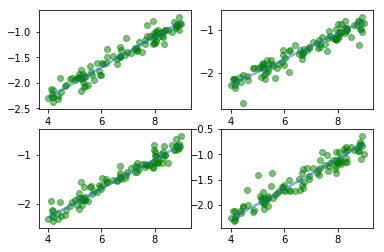

In [4]:
mp = metallicity_picker()
masses = np.random.uniform(4,9,size=100)
x = masses
y = -1.69+0.3*(x-6)
plt.subplot(221)
plt.plot(x,y,alpha=0.5)
plt.scatter(masses,mp.metallicity(masses),color='g',alpha=0.5)
plt.subplot(222)
plt.plot(x,y,alpha=0.5)
plt.scatter(masses,mp.metallicity(masses),color='g',alpha=0.5)
plt.subplot(223)
plt.plot(x,y,alpha=0.5)
plt.scatter(masses,mp.metallicity(masses),color='g',alpha=0.5)
plt.subplot(224)
plt.plot(x,y,alpha=0.5)
plt.scatter(masses,mp.metallicity(masses),color='g',alpha=0.5)

In [5]:
mp = metallicity_picker()
masses = np.random.uniform(4,9,size=10)
fnames=[]
for m in masses:
    filename = mp.isofile(m)
    print(m,filename)
    fnames += [filename]

6.051107528498938 MIST_v1.2_vvcrit0.4_HSC/MIST_v1.2_feh_m1.75_afe_p0.0_vvcrit0.4_HSC.iso.cmd
7.138686729095092 MIST_v1.2_vvcrit0.4_HSC/MIST_v1.2_feh_m1.25_afe_p0.0_vvcrit0.4_HSC.iso.cmd
7.356152208237386 MIST_v1.2_vvcrit0.4_HSC/MIST_v1.2_feh_m1.25_afe_p0.0_vvcrit0.4_HSC.iso.cmd
5.953295790930769 MIST_v1.2_vvcrit0.4_HSC/MIST_v1.2_feh_m1.50_afe_p0.0_vvcrit0.4_HSC.iso.cmd
6.8015678327952465 MIST_v1.2_vvcrit0.4_HSC/MIST_v1.2_feh_m1.50_afe_p0.0_vvcrit0.4_HSC.iso.cmd
8.502322630253712 MIST_v1.2_vvcrit0.4_HSC/MIST_v1.2_feh_m1.00_afe_p0.0_vvcrit0.4_HSC.iso.cmd
8.18836748732506 MIST_v1.2_vvcrit0.4_HSC/MIST_v1.2_feh_m1.00_afe_p0.0_vvcrit0.4_HSC.iso.cmd
4.50469088450692 MIST_v1.2_vvcrit0.4_HSC/MIST_v1.2_feh_m2.00_afe_p0.0_vvcrit0.4_HSC.iso.cmd
8.858456597886292 MIST_v1.2_vvcrit0.4_HSC/MIST_v1.2_feh_m1.00_afe_p0.0_vvcrit0.4_HSC.iso.cmd
5.612532119713119 MIST_v1.2_vvcrit0.4_HSC/MIST_v1.2_feh_m2.00_afe_p0.0_vvcrit0.4_HSC.iso.cmd


In [6]:
mass = 7.2
t = mp.isofile(mass,return_table=True)
t[:5]

EEP,log10_isochrone_age_yr,initial_mass,star_mass,log_Teff,log_g,log_L,[Fe/H]_init,[Fe/H],hsc_g,hsc_r,hsc_i,hsc_z,hsc_y,hsc_nb816,hsc_nb921,phase
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
27,5.0,0.1,0.09999997884939602,3.563975572237364,3.2481286404126455,-0.5994345301239741,-1.75,-1.704485,8.096994,6.816567,6.197874,6.027493,5.763504,6.056715,5.841404,-1.0
28,5.0,0.10349636192963839,0.10349633952698128,3.5654769046810393,3.244456854029215,-0.5774438408196856,-1.75,-1.704389,8.026941,6.755539,6.141888,5.973908,5.710882,6.001816,5.788277,-1.0
29,5.0,0.10741000114164859,0.10740997728276695,3.567140997803672,3.240426203349883,-0.5529736671642219,-1.75,-1.704413,7.94884,6.687622,6.079504,5.91402,5.652286,5.940475,5.729201,-1.0
30,5.0,0.11130293499723456,0.1113029096293481,3.5687785000730416,3.2365251990782937,-0.5288124239908709,-1.75,-1.704413,7.871651,6.620256,6.01771,5.854882,5.594214,5.87993,5.670652,-1.0
31,5.0,0.11517979396245145,0.11517976703122365,3.5703912954535433,3.232733031473676,-0.504915458007971,-1.75,-1.704413,7.795211,6.55358,5.956586,5.796372,5.53676,5.820062,5.612727,-1.0


In [7]:
mp.agerows(mass,t)[:5]

7.945019929372495 9.900094990933662


EEP,log10_isochrone_age_yr,initial_mass,star_mass,log_Teff,log_g,log_L,[Fe/H]_init,[Fe/H],hsc_g,hsc_r,hsc_i,hsc_z,hsc_y,hsc_nb816,hsc_nb921,phase
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
240,9.900000000000002,0.1,0.09999925985238922,3.540402695514787,5.347189485595537,-2.7927900047734022,-1.75,-1.727254,13.93434,12.442345,11.615109,11.403461,11.139883,11.490523,11.205937,0.0
241,9.900000000000002,0.10106625127106178,0.10106549538800508,3.5413074306343173,5.343983189124536,-2.7822096537881973,-1.75,-1.727272,13.897538,12.4101,11.588397,11.3782,11.114999,11.463856,11.180964,0.0
242,9.900000000000002,0.10417072931071811,0.10416992567793391,3.5439418025799325,5.334646136961384,-2.751401794687857,-1.75,-1.727123,13.790144,12.316485,11.510542,11.304482,11.042398,11.386135,11.108116,0.0
243,9.900000000000002,0.10716356563110904,0.10716271318661158,3.5464817391488084,5.325641344619033,-2.7216971201028177,-1.75,-1.727075,13.686043,12.225939,11.435066,11.233164,10.972107,11.310824,11.037655,0.0
244,9.900000000000002,0.11003940769969835,0.1100385056433694,3.5489226696258607,5.3169852006528435,-2.6931491516122463,-1.75,-1.726976,13.585482,12.138568,11.361929,11.164341,10.904265,11.237895,10.969707,0.0
